### sklearn.cluster.AgglomerativeClustering
#### 계층적 군집분석 중 병합군집으로, 분석 시작 시 각 포인트를 하나의 클러스터로 지정하고, 그 다음 종료조건(지정한 군집 수)을 만족할 때까지 가장 유사한 두 클러스터를 병합하는 방식으로 진행
- 계층적 군집분석 : 어떤 군집에 한 번이라도 속한 개체는 분석과정에서 다른 군집과 더 가깝다고 계산되어도 다른 군집화가 허용되지 않는 방법으로, 속도도 빠르지 않은 편

#### 주요 Hyperparameter
- n_cluster : 군집의 수로, 분석자의 경험과 주관으로 결정하거나 통계적 기준에 따라 최적 군집수를 결정
- affinity : 거리 계산 방법
- linkage : 연결법

# 분석 코드

In [1]:
# 라이브러리 및 데이터 로드
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap=matplotlib.cm.get_cmap('plasma')
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('../input/big-data-certification-study/Mall_Customers.csv', encoding='utf-8')
df.head()

,ID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# 데이터셋 분리
X = df.iloc[:,[3,4]].values # Array 변환
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

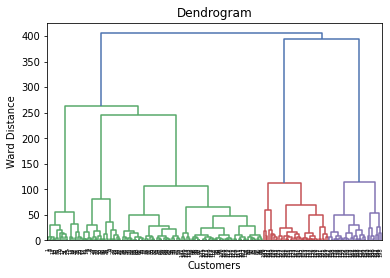

In [3]:
# Dendrogram to Choose Number of Clusters (K)
plt.figure(1)
z=sch.linkage(X,method='ward')
# 개체간 거리를 와드연결법으로 계산
dendro=sch.dendrogram(z)
# 그 결과를 덴드로그램으로 확인
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Ward Distance')
plt.show();
# 케이스가 많을 경우 묶이는 개체 번호 확인이 어려울 수 있음

### Agglomerative Clustering 적용

In [4]:
k=5 # 군집수 5로 지정
hc=AgglomerativeClustering(n_clusters=k,
                           affinity='euclidean',
                           linkage='ward')
y_hc=hc.fit_predict(X)

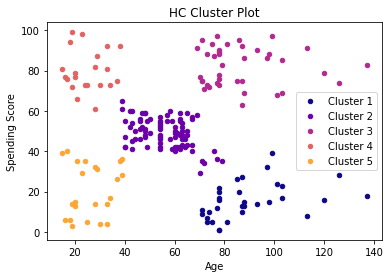

In [5]:
labels=[('Cluster '+str(i+1)) for i in range(k)]
plt.figure(2)
for i in range(k):
    plt.scatter(X[y_hc==i,0],X[y_hc==i,1],
                s=20,c=cmap(i/k),
                label=labels[i])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('HC Cluster Plot')
plt.legend()
plt.show();